In [8]:
import torch

### Convolutional autoencoder

#### This architecture is more involved, have calculate convolution parameters for direct and transpose convolution layers:
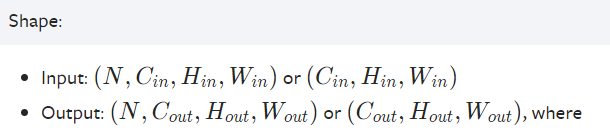


# Direct convolution

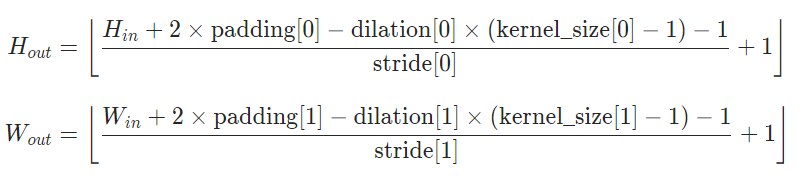

In [9]:
def conv_dims(HW, kernel_size, stride = 1, padding = 0, output_padding = 0, dilation = 1):
    """ 
        Calculate dimensions of convolution output given parameters 
    """
    HW = HW[-2:]
    a = torch.tensor([(x)*2 if type(x)!= int else x for x in [kernel_size,stride,padding,output_padding,dilation]])
    kernel_size, stride, padding, output_padding, dilation = a

    HW_out = 1/stride*(HW + 2*padding - dilation * (kernel_size - 1) - 1) + 1
    return torch.floor(HW_out).to(int)

img_shape2 = torch.tensor([1,1,28,28])
dd = {'HW':img_shape2,'kernel_size': 3,'stride': 2, 'padding': 1}
conv_dims(**dd)

tensor([14, 14])

In [10]:
conv_layer_params = torch.tensor([ #[ks , st, pd, pd_out,dil]
                                    [3  , 2 , 1 , -1    , -1],
                                    [3  , 2 , 1 , -1    , -1],
                                    [7  , 1 , 0 , -1    , -1]
])
param_names = ['kernel_size', 'stride', 'padding', 'output_padding', 'dilation']

conv_layer_params_d     = [{key:int(val) for key, val in zip(param_names, param_set) if val != -1} 
                            for param_set in conv_layer_params]

in_dims = torch.tensor((1,1,28,28))[-2:]
for i,dic in enumerate(conv_layer_params_d):
    
    out_dims = conv_dims(in_dims,**dic)
    print(f'layer {i+1}; {dic}\nin_dims -> out_dims:', in_dims, ' -> ', out_dims,'\n')
    in_dims = out_dims

layer 1; {'kernel_size': 3, 'stride': 2, 'padding': 1}
in_dims -> out_dims: tensor([28, 28])  ->  tensor([14, 14]) 

layer 2; {'kernel_size': 3, 'stride': 2, 'padding': 1}
in_dims -> out_dims: tensor([14, 14])  ->  tensor([7, 7]) 

layer 3; {'kernel_size': 7, 'stride': 1, 'padding': 0}
in_dims -> out_dims: tensor([7, 7])  ->  tensor([1, 1]) 



***
Transpose conv:

$H_{out}=(H_{in} −1)×stride[0]−2×padding[0]+dilation[0]×(kernel\_size[0]−1)+output\_padding[0]+ 1 $

$W_{out}=(W_{in}−1)×stride[1]−2×padding[1]+dilation[1]×(kernel\_size[1]−1)+output\_padding[1]+1$

In [11]:
def conv2DT_dims(HW, kernel_size, stride= 1, padding= 0, output_padding= 0, dilation= 1):
    """ 
        Calculate dimensions of Transposed convolution output given parameters 
    """
    HW = HW[-2:]
    a = torch.tensor([(x)*2 if type(x)!= int else x for x in [kernel_size,stride,padding,output_padding,dilation]])
    kernel_size, stride, padding, output_padding, dilation = a
    HW_out = (HW - 1) * stride - 2* padding + dilation * (kernel_size - 1) + output_padding + 1
    return HW_out

img_shape2 = torch.tensor([1,1,28,28])
conv2DT_dims(img_shape2, kernel_size=3, stride= 2, padding= 1)

tensor([55, 55])

In [12]:
conv_T_layer_params = torch.tensor([   #[ks , st, pd    , pd_out, dil]
                                        [7  , 2 , -1    , -1    , -1 ],
                                        [3  , 2 , 1     ,  1    , -1 ],
                                        [3  , 2 , 1     ,  1    , -1 ]
                                    ])

param_names = ['kernel_size', 'stride', 'padding', 'output_padding', 'dilation']
conv_T_layer_params_d     = [{key:int(val) for key, val in zip(param_names, param_set) if val != -1} 
                            for param_set in conv_T_layer_params]

in_dims = torch.tensor([1,1])
for i,dic in enumerate(conv_T_layer_params_d):
    out_dims = conv2DT_dims(in_dims,**dic)
    print(f'layer {i+1}; {dic}\nin_dims -> out_dims:', in_dims, ' -> ', out_dims,'\n')
    in_dims = out_dims

layer 1; {'kernel_size': 7, 'stride': 2}
in_dims -> out_dims: tensor([1, 1])  ->  tensor([7, 7]) 

layer 2; {'kernel_size': 3, 'stride': 2, 'padding': 1, 'output_padding': 1}
in_dims -> out_dims: tensor([7, 7])  ->  tensor([14, 14]) 

layer 3; {'kernel_size': 3, 'stride': 2, 'padding': 1, 'output_padding': 1}
in_dims -> out_dims: tensor([14, 14])  ->  tensor([28, 28]) 

